# PCA

# Old

https://www.pythonmorsels.com/making-auto-updating-attribute/

In [ ]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from chemtools.exploration import PrincipalComponentAnalysis as pca

In [ ]:
f = "icp.xlsx"
data = pd.ExcelFile(f)

shet = widgets.Dropdown(
    options=data.sheet_names,
    description='Data sheet:',
    disabled=False,
)
display(shet)


Dropdown(description='Data sheet:', options=('MATRICE DEI DATI',), value='MATRICE DEI DATI')

In [ ]:
df = pd.read_excel(f, sheet_name=shet.value)
df


,CAMPIONI,Cr,Cu,Mo,Mn,Ni,Pb,V
0,graffetta,0.012097,0.012704,0.002444,0.208169,0.017511,0.002835,0.000049
1,orologio,0.034978,0.172011,0.010050,0.529800,0.069733,0.005294,0.001963
2,filo,13.853548,0.256657,1.849671,1.210907,5.640097,0.002278,0.043808
3,taglierino,0.048148,0.048881,0.008404,0.643808,0.048588,0.003300,0.064381
4,fascetta,0.306884,0.005591,0.003174,0.241652,0.018525,0.003074,0.003807
5,foglio,13.250971,0.060986,0.012153,0.419739,0.105570,0.002260,0.094532
6,siringa,15.549177,0.250666,0.368831,1.734079,7.103451,0.001649,0.052999
7,spillo,0.031947,0.024526,0.007279,0.550200,2.020916,0.004162,0.001548
8,filo_2,0.047820,0.049092,0.008041,0.108227,0.049431,0.003818,0.047703
9,lama,9.996651,0.012189,0.022664,0.702806,0.084975,0.003147,0.026613


In [ ]:
pca=pca(df, variable_name_column=[1,7], sample_name_row=["CAMPIONI"])

In [ ]:
np.argmax(pca.PC_index[2, :] < pca.PC_index[2, :].mean())

2

In [ ]:
pca.eigenvalues_plot()

## Altri parametri PCA per numero minimo di PC

In [2]:
print("hello")

hello


In [3]:
from chemtools.preprocessing import matrix_variance

In [4]:
sum_eig=pca.V.sum()
print(sum_eig)
exp_var=pca.V/sum_eig
print(exp_var)
mean_eig=pca.V.mean()
print(mean_eig)
num = sum(abs(exp_var - (mean_eig/sum_eig)))
print(num)
den = den = 2*(sum_eig - mean_eig)/sum_eig
print(den)
K=(num/den)
print(K)
print("\n")
KLtmp = (1 + (p-1)*(1-K))
print(KLtmp)
KL = round(KLtmp)
print(KL)
KPtmp = pca.V.size ** (1-K)
KP = round(KPtmp)
print(KP)


NameError: name 'pca' is not defined

In [ ]:
variance_m=matrix_variance(pca.x)
variance_m

array([[ 0.16666667,  0.09464552,  0.09326822,  0.1091773 ,  0.11401943,
        -0.03739764],
       [ 0.09464552,  0.16666667,  0.1147372 ,  0.13650438,  0.13038941,
         0.02203795],
       [ 0.09326822,  0.1147372 ,  0.16666667,  0.08721288,  0.11663185,
        -0.01829091],
       [ 0.1091773 ,  0.13650438,  0.08721288,  0.16666667,  0.13727747,
         0.04135398],
       [ 0.11401943,  0.13038941,  0.11663185,  0.13727747,  0.16666667,
        -0.02860526],
       [-0.03739764,  0.02203795, -0.01829091,  0.04135398, -0.02860526,
         0.16666667]])

In [ ]:
eigenvalue=pca.V
p = pca.V.size
x=pca.correlation_matrix
j= pca.V.size

In [ ]:
n = np.linalg.matrix_rank(variance_m)
n

6

In [ ]:
EV=[]
for i in range(pca.V.size):
    EV = np.append(EV,eigenvalue[i]/(eigenvalue.sum()))
EV


array([0.62261273, 0.20125269, 0.082616  , 0.05619659, 0.0088393 ,
       0.02848269])

In [ ]:
(EV-(1/(pca.V.size))).sum() #numeratore


0.0

In [ ]:
2*(pca.V.size-1)/pca.V.size #denominatore


1.6666666666666667

In [ ]:
K=(EV-1/(pca.V.size)).sum()/(2*(pca.V.size-1)/pca.V.size)
k


NameError: name 'k' is not defined

In [ ]:
round(1+(j-1)*(1-k))


NameError: name 'k' is not defined

In [ ]:
a = sum(eigenvalue[m]/eigenvalue.sum()-1/p for m in range(n))
a

0.0

In [ ]:
k=(a+(p-n)**(1/p))/(2*(p-1)/p)
k

0.0

In [ ]:
kl=round(1+(j-1)*(1-k))
kl

6

In [ ]:
kp=round(j**(1-k))
kp

6

https://www.sciencedirect.com/science/article/pii/S0169743998001245
https://www.academia.edu/6648469/The_K_correlation_index_theory_development_and_its_application_in_chemometrics
https://www.youtube.com/watch?v=JtrPvAdVJiM&ab_channel=Mattoscacco

# New

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import f, norm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from chemtools.preprocessing import autoscaling
from chemtools.preprocessing.matrix_standard_deviation import matrix_standard_deviation
from chemtools.preprocessing import correlation_matrix
from chemtools.preprocessing import diagonalized_matrix
from chemtools.utility import reorder_array
from chemtools.utility import heatmap
from chemtools.utility import annotate_heatmap
from chemtools.utility.set_names import set_objects_names, set_variables_names
from chemtools.utility import random_colorHEX

class PrincipalComponentAnalysis:
    def __init__(self,X, variables_names=None, objects_names=None):
        self.X=X
        self.variables=set_variables_names(self.X,variables_names)
        self.objects=set_objects_names(self.X,objects_names)
        self.n_variables=self.X.shape[1]
        self.n_objects=self.X.shape[0]
        self.variables_colors=self.change_variables_colors()
        self.objects_colors=self.change_objects_colors()
    
    def fit(self):
        # Calcola la media
        self.mean = np.mean(self.X, axis=0)
        #calcola le deviazioni standard della matrice
        self.std=matrix_standard_deviation(self.X, mode="column")
        # Calcola la matrice autoscalata
        self.X_autoscaled = autoscaling(self.X)
        #Calcola la matrice do covarianza
        self.correlation_matrix = correlation_matrix(self.X_autoscaled)
        # eighenvalue enighenvector
        self.V, self.L = diagonalized_matrix(self.correlation_matrix)
        self.V_ordered, self.order = reorder_array(self.V)
        
        # riordino le PCi
        PC_index = np.array([["PC{}".format(i+1) for i in range(self.V.shape[0])], self.order, self.V_ordered])
        self.PC_index = PC_index
        self.number_of_PC = self.L.shape[1]
        
        self.L_ordered=self.L[self.order]
        # Criteri scelta nPC
        self.num_eigenvalues_greater_than_one=np.argmax(pca.V_ordered < 1)
    
    def reduction(self, n_components):
        self.n_component = n_components
        self.V_reduced=self.V_ordered[:n_components]
        # Calcola la matrice di trasformazione
        self.W = self.L_ordered[:, :n_components]
        # Riduce la dimensionalità dei dati
        self.T = np.dot(self.X_autoscaled, self.W)
    
    def statistics(self,alpha=0.05):
        self.X_reconstructed = np.dot(self.T, self.W.T)
        self.E = self.X_autoscaled - self.X_reconstructed
        self.T2 = np.diag(self.T @ np.diag(self.V_ordered[:self.n_component] ** (-1)) @ self.T.T)
        self.T2con = self.T @ np.diag(self.V_ordered[:self.n_component] ** (-1 / 2)) @ self.W.T
        self.Q = np.sum(self.E ** 2, axis=1)
        self.Qcon = self.E
        self.T2_critical_value=self.hotellings_t2_critical_value(alpha=alpha)
    

    def hotellings_t2_critical_value(self, alpha=0.05):
        p = self.n_variables
        n = self.n_objects
        f_critical_value = f.ppf(1 - alpha, p, n - p)
        return (p * (n - 1)) / (n - p) * f_critical_value
    
    def change_variables_colors(self):
        return random_colorHEX(self.n_variables)
    def change_objects_colors(self):
        return random_colorHEX(self.n_objects)

    ### PLots ----------------------------------------------------------------
    def plot_correlation_matrix(self, cmap="coolwarm", threshold=None):
        """_summary_

        Args:
            cmap (str, optional): Colormap color. Defaults to "coolwarm".
                ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys',
                'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn','binary',
                'gist_yarg', 'gist_gray', 'gray', 'bone',
                'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper','PiYG', 'PRGn',
                'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
                'twilight', 'twilight_shifted', 'hsv','Pastel1', 'Pastel2',
                'Paired', 'Accent', 'Dark2',
                'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                'tab20c','flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                'turbo', 'nipy_spectral', 'gist_ncar']
            threshold (_type_, optional): Value in data units according to which the colors
                from textcolors are applied.  If None (the default) uses the middle of the
                colormap as separation.  Optional.
            pfig (bool, optional): _description_. Defaults to False.
        """
        fig, ax = plt.subplots(figsize=(10, 10))
        im, cbar = heatmap(self.correlation_matrix, self.variables, self.variables, ax=ax, cmap=cmap, cbarlabel="Correlation value")
        texts = annotate_heatmap(im, threshold=threshold, valfmt="{x:.2f}")
        ax.set_title("Correlation Matrix")
        plt.tight_layout()

    def plot_eigenvalues_greater_than_one(self):
        #plt.figure(figsize=(self.PC_index.shape[1], 5))
        # grafico degli autovalori maggiori di 1
        # da verificare un attimo se non rimane uguale all'autovalore medio
        plt.axvline(
            x=self.num_eigenvalues_greater_than_one-0.5, #lìultimo 1 è la condizione
            color="brown",
            linestyle="-",
            label="Autovalori maggiori di 1",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_eigenvalues_variance(self):
        #plt.figure(figsize=(self.PC_index.shape[1], 5))
        # grafico degli autovalori
        plt.bar(
            x=self.PC_index[0, :],
            height=(self.V_ordered/ self.V_ordered.sum()) * 100,
            fill=False,
            edgecolor="darkorange",
            label="Varianza %",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_cumulative_variance(self):
        c = np.cumsum(self.V_ordered / self.V_ordered.sum()) * 100
        plt.bar(
            x=self.PC_index[0, :],
            height=c,
            fill=False,
            edgecolor="black",
            linestyle="--",
            width=0.6,
            label="Varianza cumulata %",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_average_eigenvalue_criterion(self):
        plt.axvline(
            x=np.argmax(self.V_ordered < self.V_ordered.mean()) - 0.5,
            color="red",
            alpha=0.5,
            linestyle="-",
            label="AEC",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_KP_criterion(self):
        rank = np.linalg.matrix_rank(self.correlation_matrix)
        sum_term = sum(self.V[m] / self.V.sum() - 1 / self.V.size for m in range(rank))
        x = round(1+(self.V.size-1)*(1-((sum_term+(self.V.size-rank)**(1/self.V.size))/(2*(self.V.size-1)/self.V.size))))-1
        plt.axvline(
            x=x,
            color="purple",
            alpha=0.5,
            linestyle="--",
            label="KP",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_KL_criterion(self):
        rank = np.linalg.matrix_rank(self.correlation_matrix)
        sum_term = sum(self.V[m] / self.V.sum() - 1 / self.V.size for m in range(rank))
        x = round(self.V.size**(1-(sum_term+(self.V.size-rank)**(1/self.V.size))/(2*(self.V.size-1)/self.V.size)))-1
        plt.axvline(
            x=x,
            color="cyan",
            alpha=0.5,
            linestyle="-",
            label="KL",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_CAEC_criterion(self):
        plt.axvline(
            x=np.argmax(self.V_ordered < 0.7 * self.V_ordered.mean())-0.5,
            color="blue",
            alpha=0.5,
            linestyle="--",
            label="CAEC",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_broken_stick(self):
        n = self.V_ordered.shape[0]
        dm = (100 / n) * np.cumsum(1 / np.arange(1, n + 1)[::-1])
        plt.plot(self.PC_index[0, :], dm, color="lightgreen", label="Broken stick")
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")
    
    def plot_eigenvalue(self):
        self.plot_eigenvalues_greater_than_one()
        self.plot_eigenvalues_variance()
        self.plot_cumulative_variance()
        self.plot_average_eigenvalue_criterion()
        self.plot_KP_criterion()
        self.plot_KL_criterion()
        self.plot_CAEC_criterion()
        self.plot_broken_stick()

    def plot_hotteling_t2_vs_q(self):
        # Calcola Q critico
        #Q_critico =f_value/(self.T.shape[0]-self.T.shape[1])
        # Crea il grafico
        for i in range(len(self.Q)):
            plt.plot(self.Q[i], self.T2[i], 'o', label=self.objects[i])
        # Aggiungi il valore di T2 critico
        #plt.axhline(y=T2_critico, color='r', linestyle='-', label=r"$T^2_{crit}$")
        # Aggiungi il valore di Q critico
        #plt.axvline(x=Q_critico, color='r', linestyle='-', label=r"$Q_{crit}$")
        plt.xlabel(r'$Q$')
        plt.ylabel(r'$Hotteling\'s T^2$')
        plt.legend(loc="best")

    def plot_pci_contribution(self, text_color="black"):
        for i in range(self.W.shape[1]):
            plt.plot(np.arange(self.n_variables),self.W[:, i],marker="o",markerfacecolor="none",label=f"PC$_{i+1}$")
        plt.title(f"Contributions of the PC$_i$")
        plt.xticks(np.arange(self.n_variables), self.variables)
        plt.legend(labelcolor=text_color)
        plt.xlabel("Variable")
        plt.ylabel("Value of loading")
    

    def plot_loadings(self,arrows=True, text_color="black"):
        # Loadings plot
        fig, axs = plt.subplots(
            self.n_component,
            self.n_component,
            figsize=(5 * self.n_component, 5 * self.n_component),
        )
        a = 1
        for i in range(self.n_component):
            for j in range(self.n_component):
                fig.suptitle("Loadings plot", fontsize=24, y=1, color=text_color)
                ax = plt.subplot(self.n_component, self.n_component, a)
                if i != j:
                    for d in range(self.n_variables):
                        #######################
                        if self.W[d, i] > self.W[:, i].mean():
                            if self.W[d, j] > self.W[:, j].mean():
                                position = ["left", "bottom"]
                            elif self.W[d, j] < self.W[:, j].mean():
                                position = ["right", "top"]
                        elif self.W[d, i] < self.W[:, i].mean():
                            if self.W[d, j] > self.W[:, j].mean():
                                position = ["left", "bottom"]
                            elif self.W[d, j] < self.W[:, j].mean():
                                position = ["right", "top"]
                        ######################
                        ax.scatter(
                            x=self.W[d, i],
                            y=self.W[d, j],
                            label=self.variables[d],
                            color=self.variables_colors[d],
                        )
                        if arrows == True:
                            ax.arrow(
                                0,
                                0,
                                self.W[d, i],
                                self.W[d, j],
                                length_includes_head=True,
                                head_width=0.015,
                                color=text_color,
                                alpha=0.3,
                            )
                        ax.annotate(
                            text=self.variables[d],
                            xy=(self.W[d, i], self.W[d, j]),
                            ha=position[0],
                            va=position[1],
                            color=text_color,
                        )
                        ax.set_xlabel(rf"PC$_{i+1}$")
                        ax.set_ylabel(rf"PC$_{j+1}$")
                        # ax.legend()
                    handles, labels = ax.get_legend_handles_labels()
                    # fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5),labelcolor=text_color, framealpha=0.1)
                    # fig.legend(labels=variable)
                if i == j:
                    # build a square in axes coords
                    left, width = 0, 1
                    bottom, height = 0, 1
                    right = left + width
                    top = bottom + height
                    # axes coordinates: (0, 0) is bottom left and (1, 1) is upper right
                    p = patches.Rectangle(
                        (left, bottom),
                        width,
                        height,
                        fill=False,
                        transform=ax.transAxes,
                        clip_on=False,
                    )
                    ax.text(
                        0.5 * (left + right),
                        0.5 * (bottom + top),
                        rf"PC$_{i+1}$",
                        horizontalalignment="center",
                        verticalalignment="center",
                        fontsize=20,
                        color=text_color,
                        transform=ax.transAxes,
                    )
                    ax.set_xticks([])
                    ax.set_yticks([])

                a += 1
        fig.legend(
            handles,
            labels,
            loc="center left",
            bbox_to_anchor=(1, 0.5),
            labelcolor=text_color,
        )

    def plot_scores(self,label_point=False,text_color="black"):
        # Scores plot
        fig, axs = plt.subplots(
            self.n_component,
            self.n_component,
            figsize=(5 * self.n_component, 5 * self.n_component),
        )
        a = 1
        for i in range(self.n_component):
            for j in range(self.n_component):
                fig.tight_layout()
                fig.suptitle("Scores plot", fontsize=24, y=1, color=text_color)
                ax = plt.subplot(self.n_component, self.n_component, a)
                if i != j:
                    for d in range(self.n_objects):
                        # ax.scatter(x=T_r[d,i], y=T_r[d,j], c=sample_color[d], edgecolors='black', label=sample[d])
                        ax.scatter(
                            x=self.T[d, i],
                            y=self.T[d, j],
                            c=self.objects_colors[d],
                            label=self.objects[d],
                        )
                        if label_point == True:
                            try:
                                ax.annotate(
                                    text=self.objects[d][0],
                                    xy=(self.T[d, i], self.T[d, j]),
                                    color=text_color,
                                )
                            except:
                                pass
                        ax.set_xlabel(f"PC{i+1}")
                        ax.set_ylabel(f"PC{j+1}")
                        # ax.legend()
                    handles, labels = ax.get_legend_handles_labels()
                    # fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), labelcolor=text_color, framealpha=0.1)
                if i == j:
                    # build a square in axes coords
                    left, width = 0, 1
                    bottom, height = 0, 1
                    right = left + width
                    top = bottom + height
                    # axes coordinates: (0, 0) is bottom left and (1, 1) is upper right
                    p = patches.Rectangle(
                        (left, bottom),
                        width,
                        height,
                        fill=False,
                        transform=ax.transAxes,
                        clip_on=False,
                    )
                    ax.text(
                        0.5 * (left + right),
                        0.5 * (bottom + top),
                        f"PC{i+1}",
                        horizontalalignment="center",
                        verticalalignment="center",
                        fontsize=20,
                        color=text_color,
                        transform=ax.transAxes,
                    )
                    ax.set_xticks([])
                    ax.set_yticks([])
                a += 1
        fig.legend(
            handles,
            labels,
            loc="center left",
            bbox_to_anchor=(1, 0.5),
            labelcolor=text_color,
        )
    def plot_biplot(
            self,
            label_point=False,
            subplot_dimensions=[5, 5],text_color="black"):
            # biplots
            fig, axs = plt.subplots(
                self.n_component,
                self.n_component,
                figsize=(
                    subplot_dimensions[0] * self.n_component,
                    subplot_dimensions[1] * self.n_component,
                ),
            )
            fig.suptitle("Biplots plot", fontsize=24, y=1, color=text_color)
            a = 1
            for i in range(self.n_component):
                for j in range(self.n_component):
                    ax = plt.subplot(self.n_component, self.n_component, a)
                    if i != j:
                        for e in range(self.n_objects):
                            # ax.scatter(x=T_r[e,i], y=T_r[e,j], c=sample_color[e], edgecolors='black', label=sample[e])
                            ax.scatter(
                                x=self.T[e, i],
                                y=self.T[e, j],
                                c=self.objects_colors[e],
                                label=self.objects[e],
                            )
                            if label_point == True:
                                try:
                                    ax.annotate(
                                        text=self.objects[d],
                                        xy=(self.T[d, i], self.T[d, j]),
                                        color=text_color,
                                    )
                                except:
                                    pass
                        for d in range(self.n_variables):
                            #######################
                            if self.W[d, i] > self.W[:, i].mean():
                                if self.W[d, j] > self.W[:, j].mean():
                                    position = ["left", "bottom"]
                                elif self.W[d, j] < self.W[:, j].mean():
                                    position = ["right", "top"]
                            elif self.W[d, i] < self.W[:, i].mean():
                                if self.W[d, j] > self.W[:, j].mean():
                                    position = ["left", "bottom"]
                                elif self.W[d, j] < self.W[:, j].mean():
                                    position = ["right", "top"]
                            ######################
                            ax.arrow(
                                0,
                                0,
                                pow(self.T[:, i] ** 2, 0.5).max() * self.W[d, i],
                                pow(self.T[:, j] ** 2, 0.5).max() * self.W[d, j],
                                length_includes_head=True,
                                head_width=0.15,
                                color=text_color,
                                alpha=0.3,
                            )
                            ax.annotate(
                                text=self.variables[d],
                                xy=(
                                    pow(self.T[:, i] ** 2, 0.5).max() * self.W[d, i],
                                    pow(self.T[:, j] ** 2, 0.5).max() * self.W[d, j],
                                ),
                                ha=position[0],
                                va=position[1],
                                color=text_color,
                            )
                        ax.set_xlabel(f"PC{i+1}")
                        ax.set_ylabel(f"PC{j+1}")
                        handles, labels = ax.get_legend_handles_labels()
                        # ax.legend()
                    if i == j:
                        # build a square in axes coords
                        left, width = 0, 1
                        bottom, height = 0, 1
                        right = left + width
                        top = bottom + height
                        # axes coordinates: (0, 0) is bottom left and (1, 1) is upper right
                        p = patches.Rectangle(
                            (left, bottom),
                            width,
                            height,
                            fill=False,
                            transform=ax.transAxes,
                            clip_on=False,
                        )
                        ax.text(
                            0.5 * (left + right),
                            0.5 * (bottom + top),
                            f"PC{i+1}",
                            horizontalalignment="center",
                            verticalalignment="center",
                            fontsize=20,
                            color=text_color,
                            transform=ax.transAxes,
                        )
                        ax.set_xticks([])
                        ax.set_yticks([])
                    a += 1
            fig.legend(
                handles,
                labels,
                loc="center left",
                bbox_to_anchor=(1, 0.5),
                labelcolor=text_color)

In [6]:
import numpy as np

n = 10
m = 7
X = np.random.rand(n, m)
X

array([[0.82197282, 0.46759419, 0.08510137, 0.27378084, 0.0771128 ,
        0.53897035, 0.43897725],
       [0.90171913, 0.32346858, 0.87925929, 0.29972134, 0.82165791,
        0.71332046, 0.94205006],
       [0.60480015, 0.31628955, 0.75601647, 0.39772036, 0.01827909,
        0.03554065, 0.35957012],
       [0.58753698, 0.22794793, 0.39072117, 0.15931237, 0.60524677,
        0.14731616, 0.17769299],
       [0.75378774, 0.00253078, 0.43943428, 0.9432033 , 0.5465728 ,
        0.72510402, 0.4434852 ],
       [0.23275381, 0.60297055, 0.12647727, 0.33910215, 0.04039847,
        0.05377525, 0.39930877],
       [0.30460517, 0.27246488, 0.12203307, 0.38300166, 0.43257723,
        0.63593658, 0.88765407],
       [0.70792722, 0.06049799, 0.63080648, 0.07348146, 0.87995456,
        0.87976019, 0.72600681],
       [0.95406445, 0.23339458, 0.83357193, 0.02870009, 0.02173469,
        0.16299541, 0.88582243],
       [0.08129824, 0.51214599, 0.75059663, 0.219039  , 0.41424155,
        0.83287545, 0.3

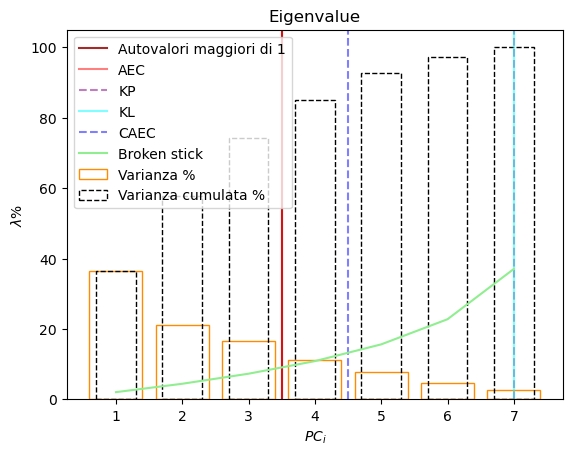

In [7]:
pca=PrincipalComponentAnalysis(X)
pca.fit()
#pca.plot_correlation_matrix()
pca.plot_eigenvalue()

In [8]:
pca.reduction(4)
pca.statistics()

In [9]:
pca.T

array([[ 0.97387157,  0.3907757 , -0.31069353, -1.00774225],
       [-1.6825861 , -0.68085599, -0.35944973, -0.46044435],
       [ 0.77858676,  1.78621893, -0.31103862,  0.44936926],
       [ 0.42238747,  0.44740721,  0.46397681,  1.69031551],
       [-2.50835007,  0.53267379,  0.04150716,  0.21481532],
       [ 2.72173195,  0.38328726,  0.70165313, -0.13898246],
       [ 0.2303963 , -1.79088261, -0.11143837, -0.41896398],
       [-1.82974145, -1.49163437, -0.17405655,  0.46747472],
       [ 0.34974585,  0.58423523, -2.26477111, -0.10450353],
       [ 0.54395773, -0.16122516,  2.32431081, -0.69133824]])

<BarContainer object of 7 artists>

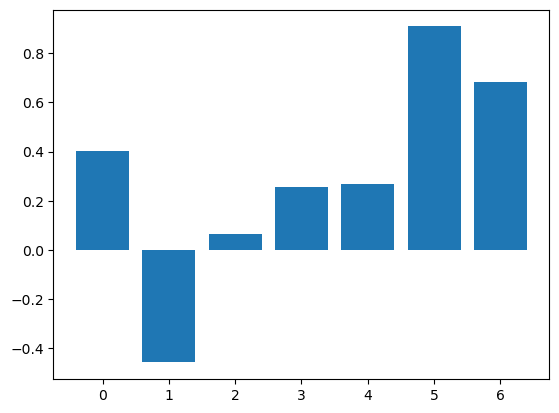

In [10]:
plt.bar(([0,1,2,3,4,5,6]),pca.T2con[1,:])

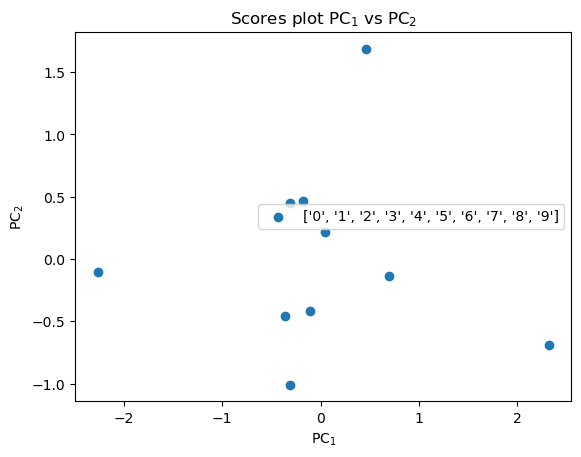

In [15]:
def plot_scores(x=None,y=None):
    plt.scatter(pca.T[:,x+1],pca.T[:,y+1],label=pca.objects)
    plt.title(rf"Scores plot PC$_{x}$ vs PC$_{y}$")
    plt.xlabel(rf"PC$_{x}$")
    plt.ylabel(rf"PC$_{y}$")
    plt.legend()

plot_scores(x=1,y=2)

In [ ]:
#Sì, posso convertire il codice MATLAB in codice Python. Ecco un esempio di come potrebbe essere fatto:
from scipy.stats import f, norm
import numpy as np

lev_conf = 0.95
comp = pca.n_component # insert the value of comp here
nobj = pca.n_objects # insert the value of nobj here
E = np.diag(pca.V_ordered[:pca.n_component]**(2/(nobj-1)))# insert the values of E here

# T2 limit
F = f.ppf(lev_conf, comp, nobj - comp)
tlim = comp * (nobj - 1) / (nobj - comp) * F

# Q limit
t1 = np.sum(E[comp:] ** 1)
t2 = np.sum(E[comp:] ** 2)
t3 = np.sum(E[comp:] ** 3)
ho = 1 - (2 * t1 * t3) / (3 * t2 ** 2)
ca = norm.ppf(0.95, 0, 1)
term1 = (ho * ca * (2 * t2) ** 0.5) / t1
term2 = (t2 * ho * (ho - 1)) / (t1 ** 2)
qlim = t1 * (term1 + 1 + term2) ** (1 / ho)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19528\1787670839.py:18: RuntimeWarning: invalid value encountered in scalar divide
  ho = 1 - (2 * t1 * t3) / (3 * t2 ** 2)


: 

: 

In [ ]:
print(tlim)

27.20206170165146


: 

: 

In [ ]:
print(t1)

0.0


: 

: 

In [ ]:
np.sum(E[comp:] ** 1)E[comp:] ** 2

SyntaxError: invalid syntax (2939310204.py, line 1)

: 

: 

In [ ]:
E[comp:] ** 2

array([], shape=(0, 4), dtype=float64)

: 

: 

In [ ]:
def hotellings_t2_critical_value(pca, alpha):
    p = pca.n_variables
    n = pca.n_objects
    f_critical_value = f.ppf(1 - alpha, p, n - p)
    T2_critical_value = (p * (n - 1)) / (n - p) * f_critical_value
    return T2_critical_value

: 

: 

In [ ]:
hotellings_t2_critical_value(pca=pca, alpha=0.5)

24.111761370660588

: 

: 

: 

: 

test 2

In [1]:
from chemtools.exploration import PrincipalComponentAnalysis, ExtendedPrincipalComponentAnalysis, MultipleCorrespondenceAnalysis, FactorAnalysisForMixedData, GeneralizedCanonicalCorrelationAnalysis
import numpy as np
# Esempio di utilizzo
X = np.array(
    [
        [2.5, 2.4, 3.1, 4.2],
        [0.5, 0.7, 1.2, 2.3],
        [2.2, 2.9, 3.5, 4.1],
        [1.9, 2.2, 2.8, 3.7],
        [3.1, 3.0, 4.0, 5.0],
        [2.3, 2.7, 3.2, 4.0],
        [2.0, 1.6, 2.5, 3.3],
        [1.0, 1.1, 1.8, 2.5],
        [1.5, 1.6, 2.2, 3.0],
        [1.1, 0.9, 1.5, 2.0],
    ]
)


pca = PrincipalComponentAnalysis(X)
pca.fit()

xpca = ExtendedPrincipalComponentAnalysis(X)
xpca.fit()

mca = MultipleCorrespondenceAnalysis(X)
mca.fit()

famd = FactorAnalysisForMixedData(X)
famd.fit()

gcca = GeneralizedCanonicalCorrelationAnalysis(X)
gcca.fit()

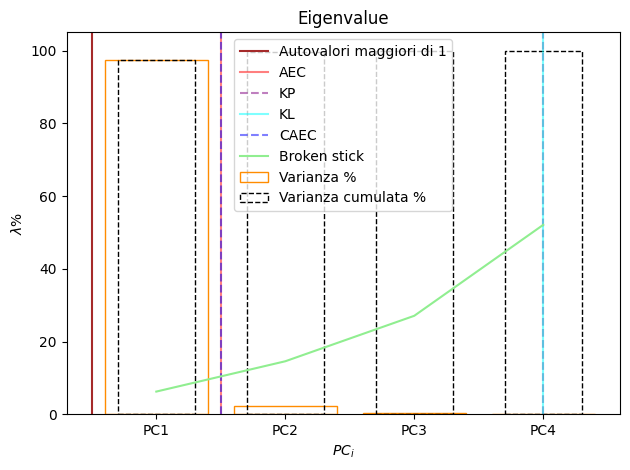

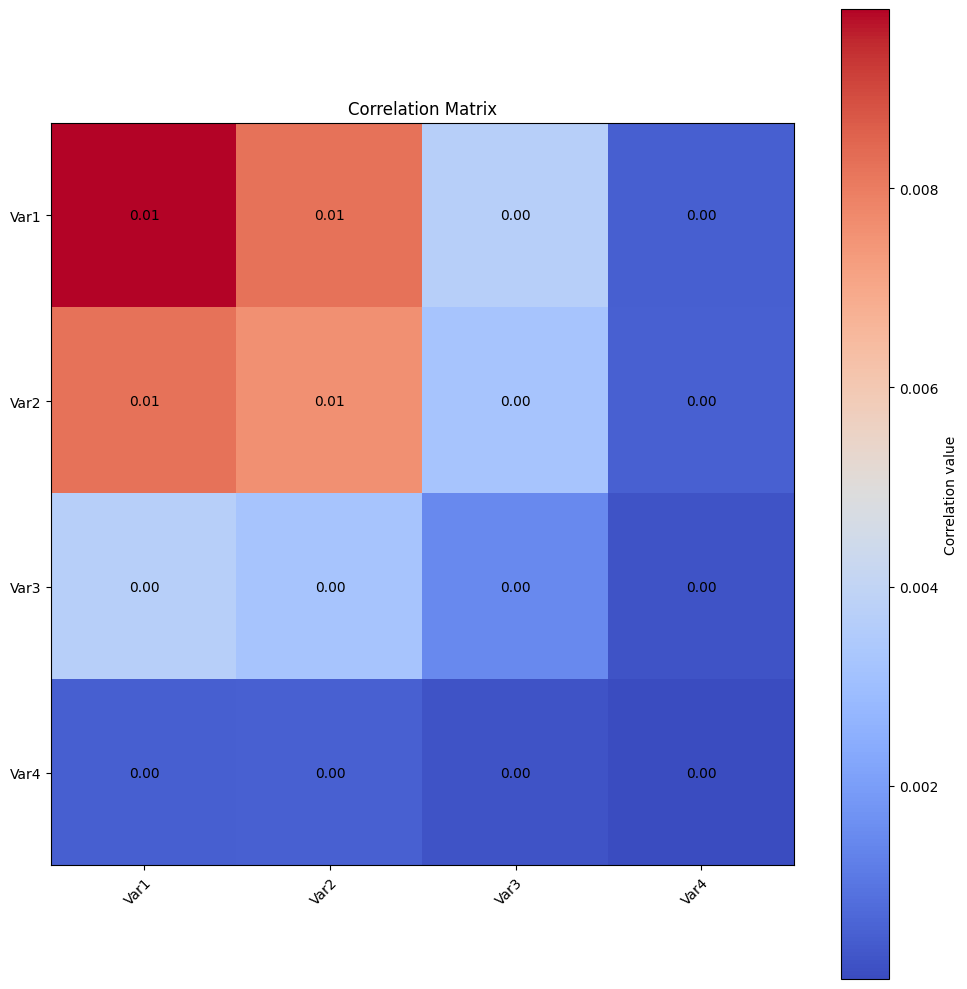

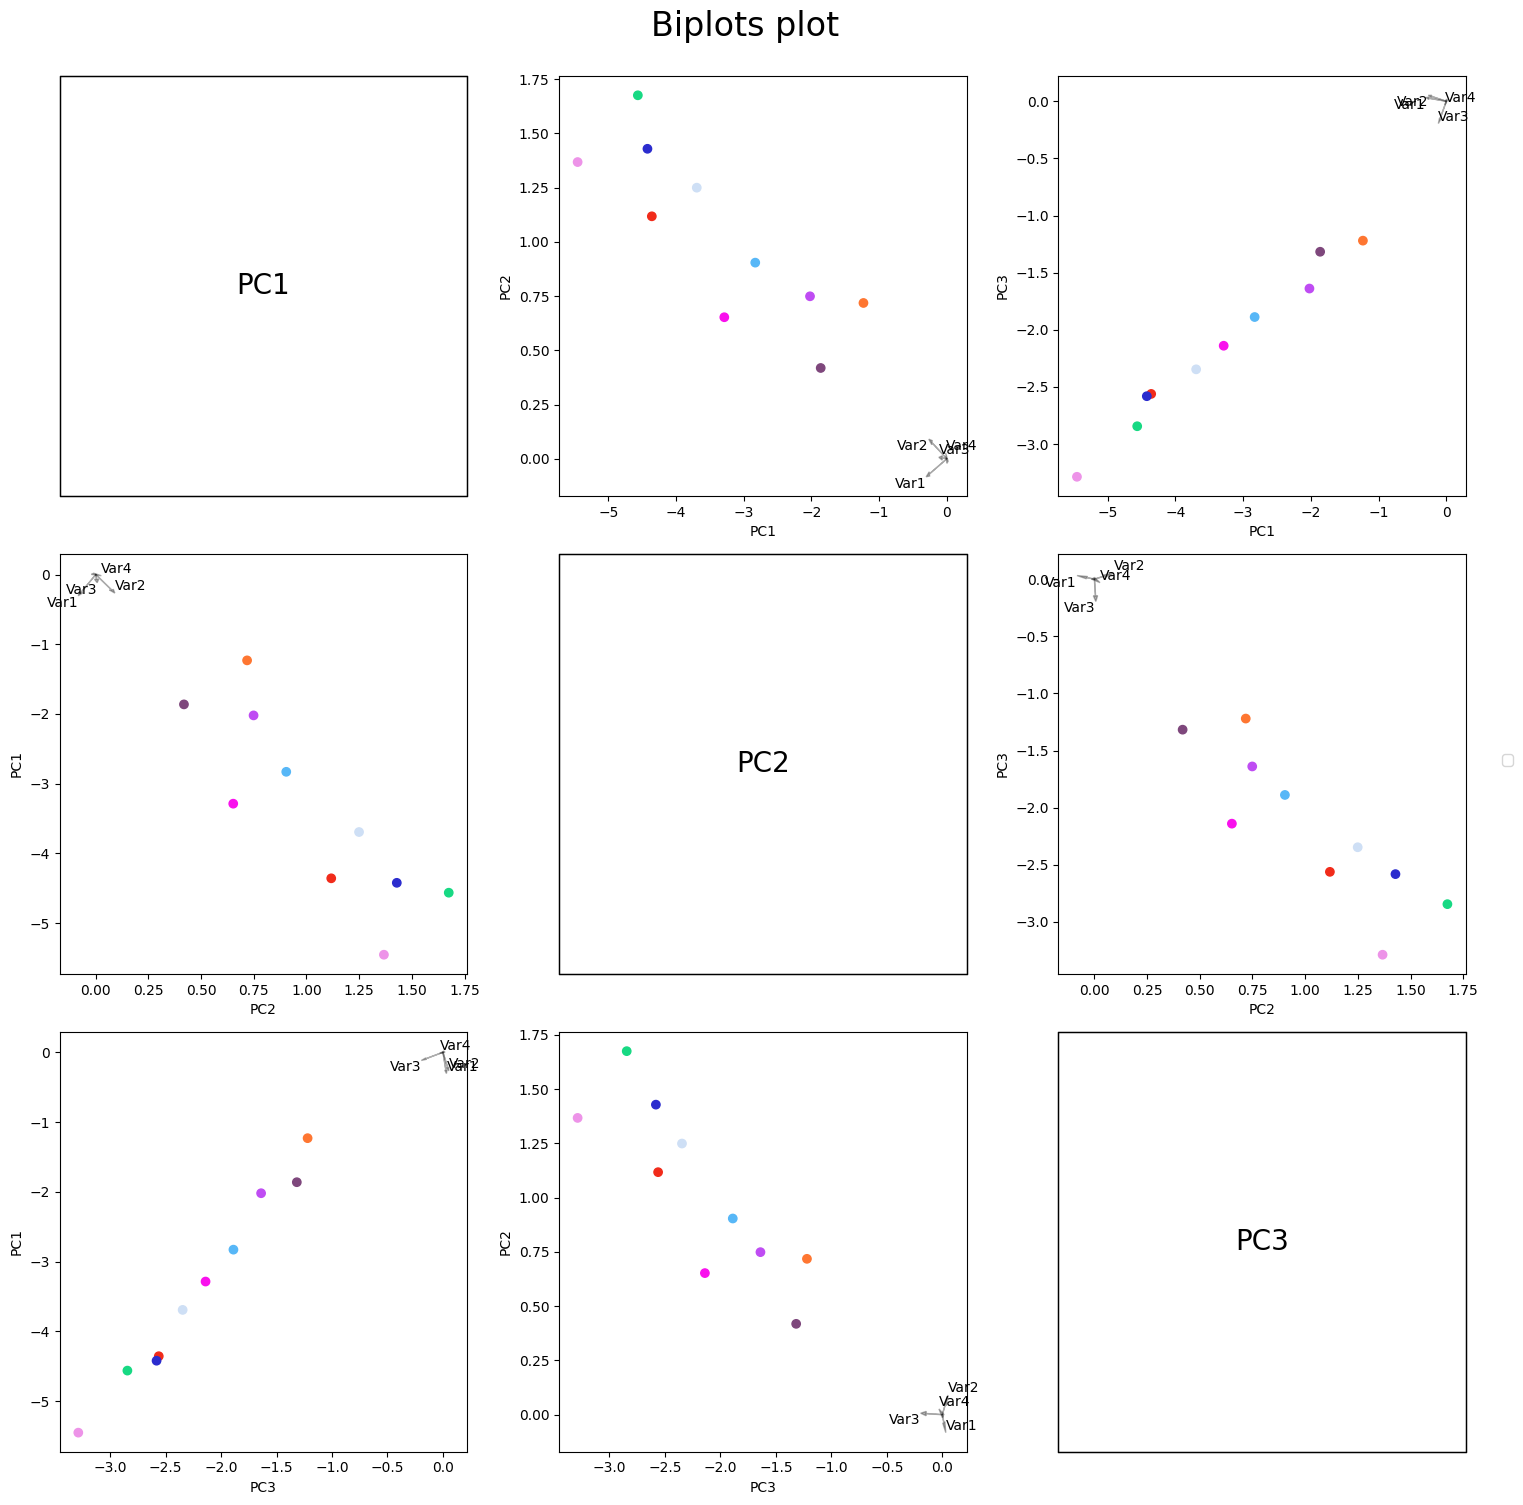

In [8]:
xpca.plot_eigenvalue()
xpca.plot_correlation_matrix()
xpca.reduction(n_components=3)
xpca.plot_biplot()

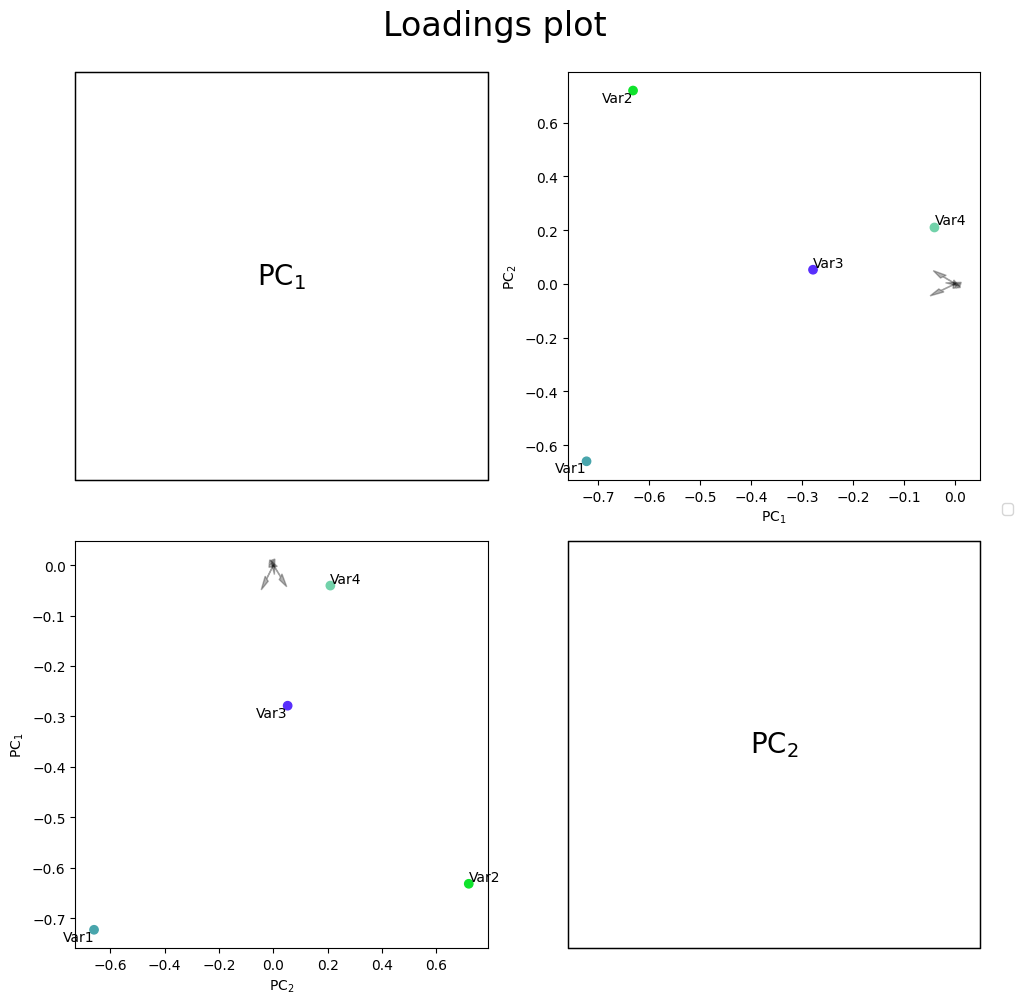

In [3]:
xpca.plot_loadings()

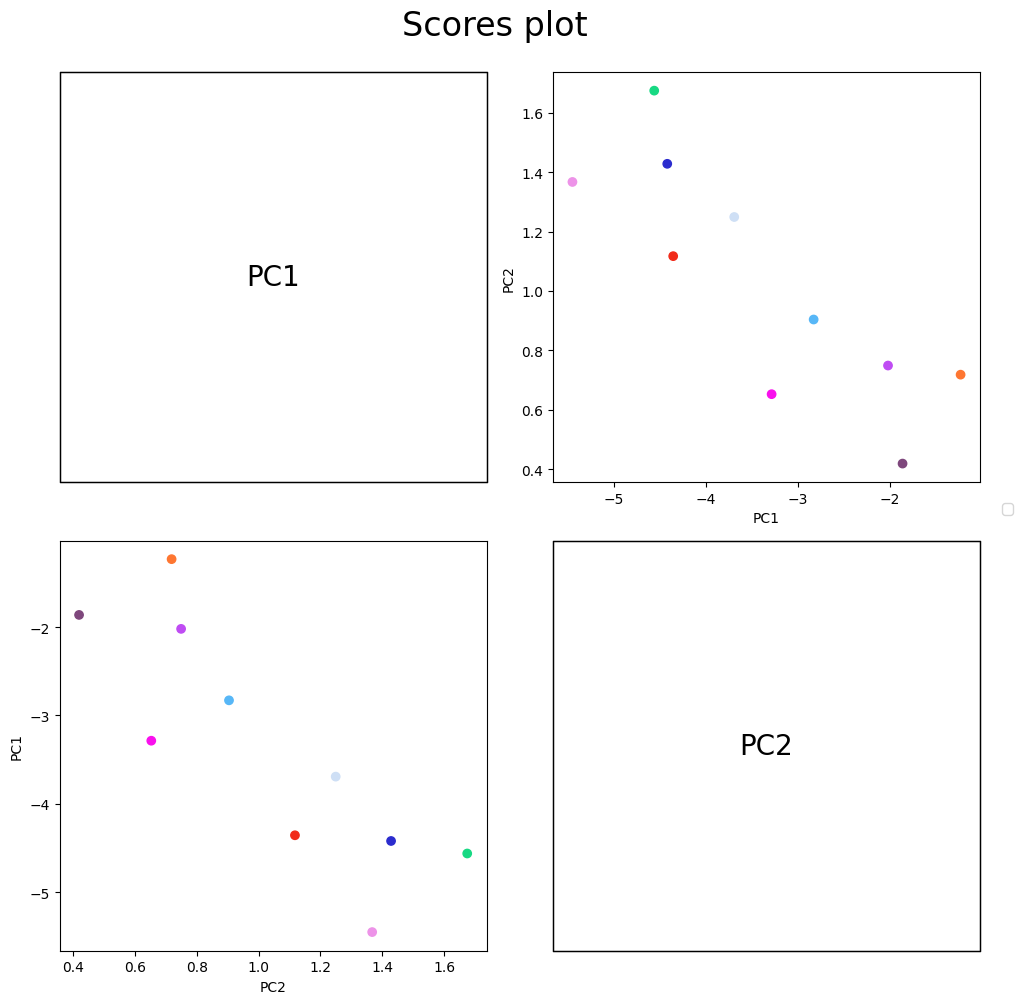

In [7]:
xpca.plot_scores()